## Demo for learning field dependent aberration from bead data

##### Setup environment

In [1]:
import sys
sys.path.append("..")
from psflearning.psflearninglib import psflearninglib
from psflearning import io
from psflearning.makeplots import *

##### Create psflearning object and load the config file
$\small\color{skyblue}{\mathrm{basefile}}$: config file with all parameters  
$\small\color{skyblue}{\mathrm{sysfile}}$: config file with microscope specific parameters  
For advanced user, pass in base file only as below to interact with all parameters:   
```python
    L.param = io.param.combine('config_base')
```

In [2]:
L = psflearninglib()
L.param = io.param.combine('config_base',psftype='FD',channeltype='1ch',sysfile='Ast_Li')
#L.param = io.param.load('../config/config_zernike_FD.yaml').Params

##### Edit user defined parameters

In [3]:
L.param.datapath = r'E:\EMBL files\data for PSF learning\Astigmatism_beads_stacks_2um\sample/'
L.param.savename = L.param.datapath + 'psfmodel7'
L.param.keyword = 'bead' # keyword for your data file
L.param.subfolder = 'bead' # keyword for subfolder name if each data file is saved in a individual folder, set to '' if no subfolder
L.param.gain = 0.47
L.param.ccd_offset = 100
L.param.FOV.z_step = 5  
L.param.pixel_size.z = 0.05 # micron, equal to z_step*stepsize_of_the_data
L.param.roi.max_bead_number = 200 # lower this number if out of memory 
L.param.roi.peak_height = 0.4
L.param.batch_size = 50
L.param.option.model.symmetric_mag = True
L.param.loss_weight.smooth = 0.03
L.param.iteration=300
L.param.PSFtype = 'zernike_vector_FD'

##### Start learning

In [4]:
images = L.load_data()
L.getpsfclass()
dataobj = L.prep_data(images)
psfobj,fitter = L.learn_psf(dataobj,time=0)
loc_FD = L.localize_FD(fitter) # optional step, for validating each PSF model
resfile = L.save_result(psfobj,dataobj,fitter)

E:\EMBL files\data for PSF learning\Astigmatism_beads_stacks_2um\sample\astigmatism_beads_2um_10nm_1608x1608_prime95B_2\astigmatism_beads_2um_10nm_1608x1608_prime95B_2_MMStack_Default.ome.tif


E:\EMBL files\data for PSF learning\Astigmatism_beads_stacks_2um\sample\astigmatism_beads_2um_10nm_1608x1608_prime95B_1\astigmatism_beads_2um_10nm_1608x1608_prime95B_1_MMStack_Default.ome.tif
(2, 201, 1608, 1608)
rois shape channel : (178, 41, 31, 31)


3/6: learning: 114/350 [08:41s]  4.58s/it, current loss: 0.74855, total time: 521.67s
4/6: calculating spline coefficients: 1/1 [00:05s]  5.24s/it total time: 526.89s
5/6: localization: 4/4 [00:00s]  5.53it/s total time: 527.61s


outlier id: [  1   2   3  10  15  58  63  88 135 167 173 177]
rois shape channel : (166, 41, 31, 31)


3/6: learning: 355/? [26:21s]  4.45s/it, current loss: 0.44919, total time: 2108.72s  
4/6: calculating spline coefficients: 1/1 [00:05s]  5.25s/it total time: 2113.96s
5/6: localization: 4/4 [00:00s]  5.75it/s total time: 2114.65s
4/6: calculating spline coefficients: 1/1 [00:04s]  4.75s/it total time: 4.74s
5/6: localization: 4/4 [00:00s] 10.94it/s total time: 5.10s
4/6: calculating spline coefficients: 1/1 [00:04s]  4.79s/it total time: 4.78s
5/6: localization: 4/4 [00:00s] 10.85it/s total time: 5.15s
4/6: calculating spline coefficients: 1/1 [00:04s]  4.74s/it total time: 4.73s
5/6: localization: 4/4 [00:00s] 10.64it/s total time: 5.10s
4/6: calculating spline coefficients: 1/1 [00:04s]  4.78s/it total time: 4.77s
5/6: localization: 4/4 [00:00s] 10.15it/s total time: 5.16s
4/6: calculating spline coefficients: 1/1 [00:04s]  4.80s/it total time: 4.79s
5/6: localization: 4/4 [00:00s] 11.31it/s total time: 5.15s
4/6: calculating spline coefficients: 1/1 [00:04s]  4.70s/it total time: 

##### Show results

In [5]:
f,p = io.h5.load(resfile) # load result file

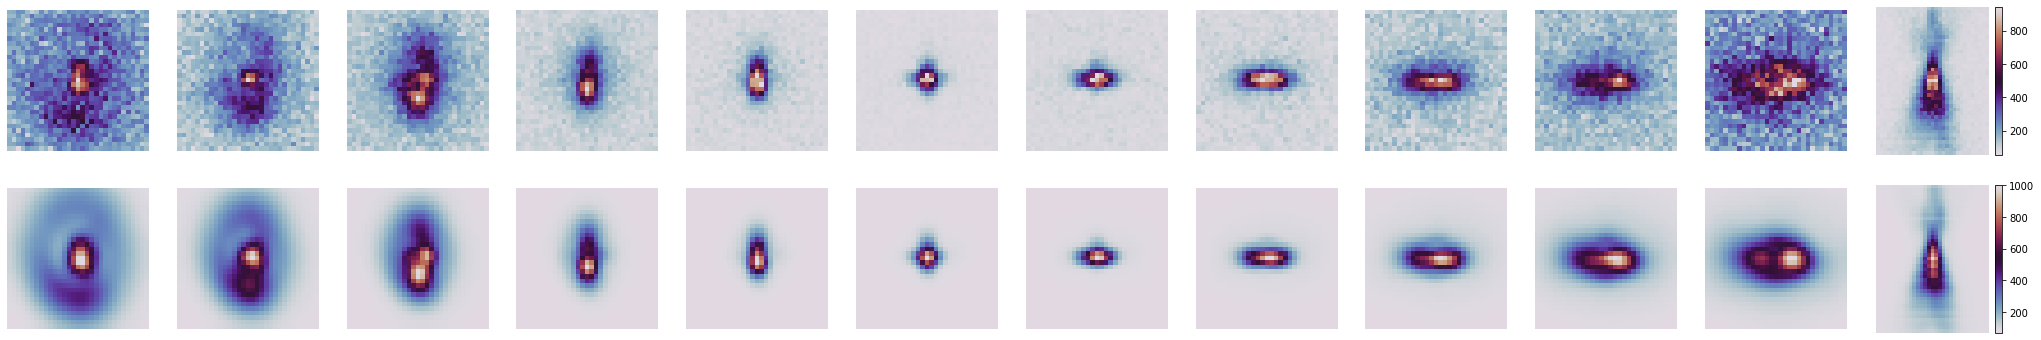

In [6]:
showpsfvsdata(f,p,index=45)

In [7]:
f.res.sigma

array([0.63164777, 0.8555571 ], dtype=float32)

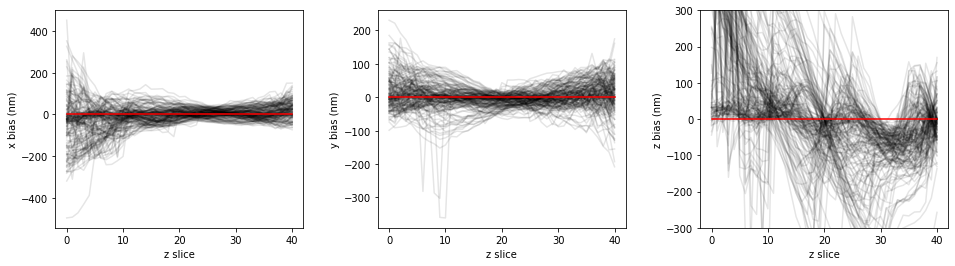

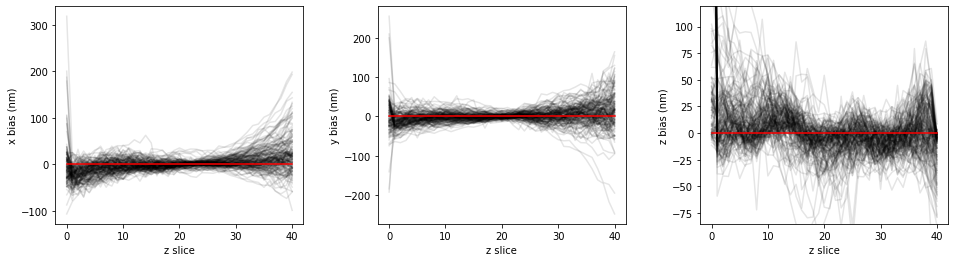

In [8]:
showlocalization(f,p)

##### Optional plots

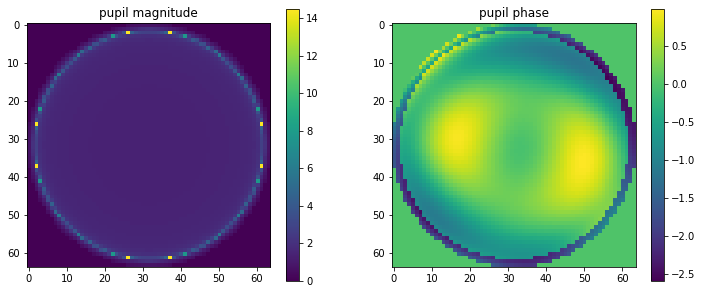

In [9]:
showpupil(f,p,index=15)

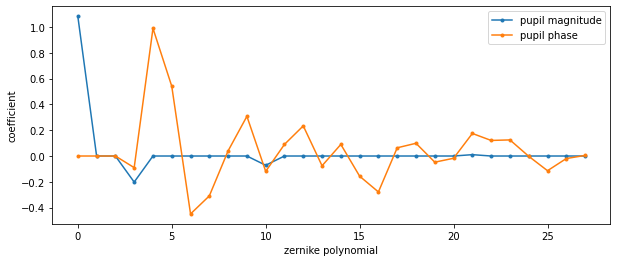

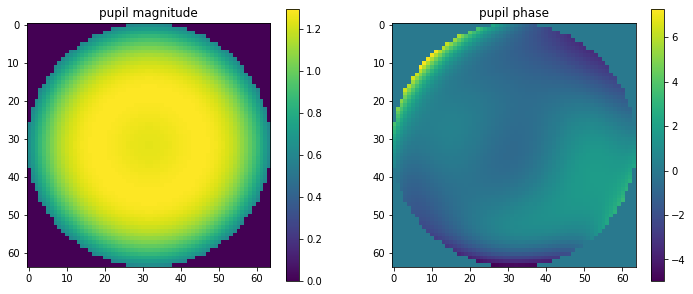

In [10]:
showzernike(f,p,index=5)

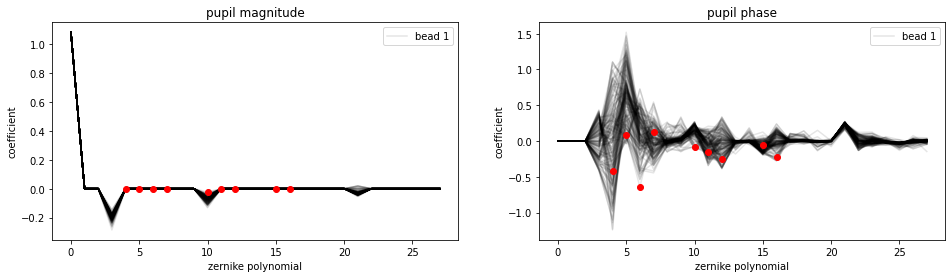

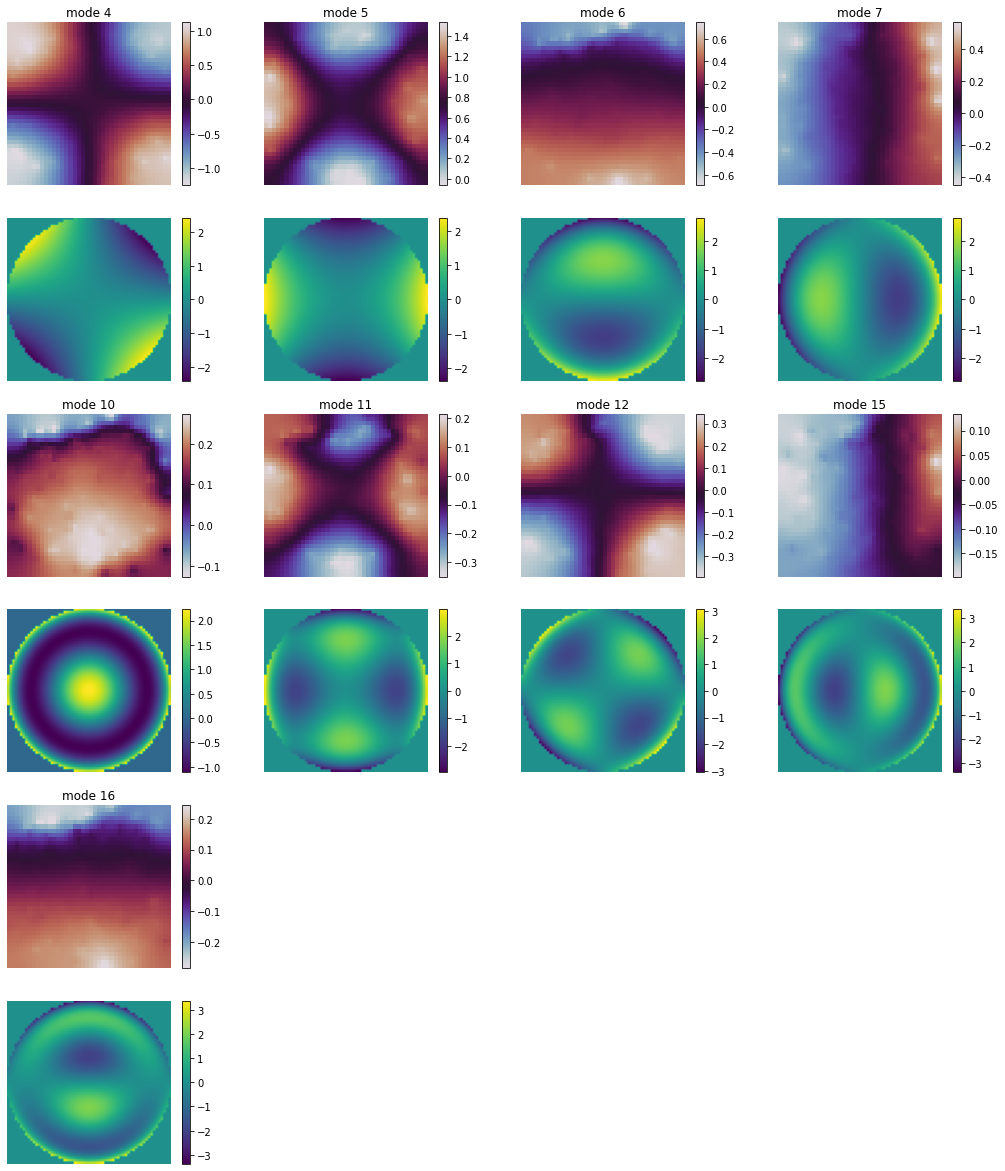

In [12]:
showzernikemap(f,p,index=[4,5,6,7,10,11,12,15,16])

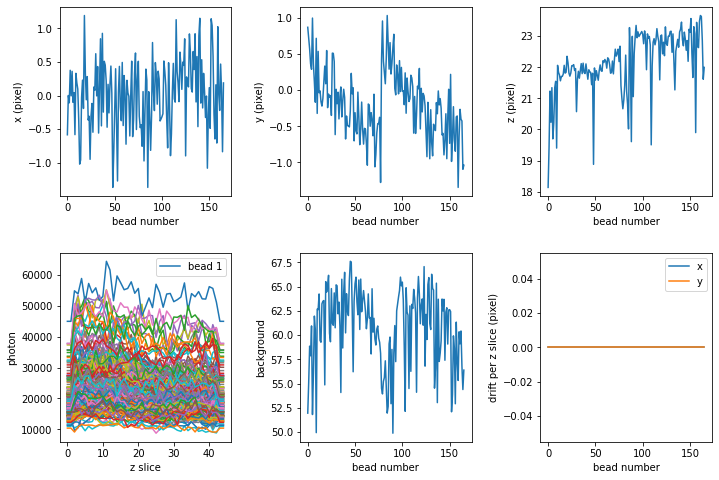

In [13]:
showlearnedparam(f,p)

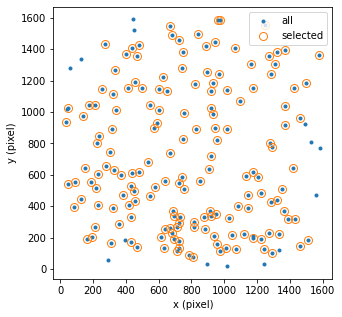

In [12]:
showcoord(f,p)